# Airplane Crashes | Exploratory Data Analysis (EDA)

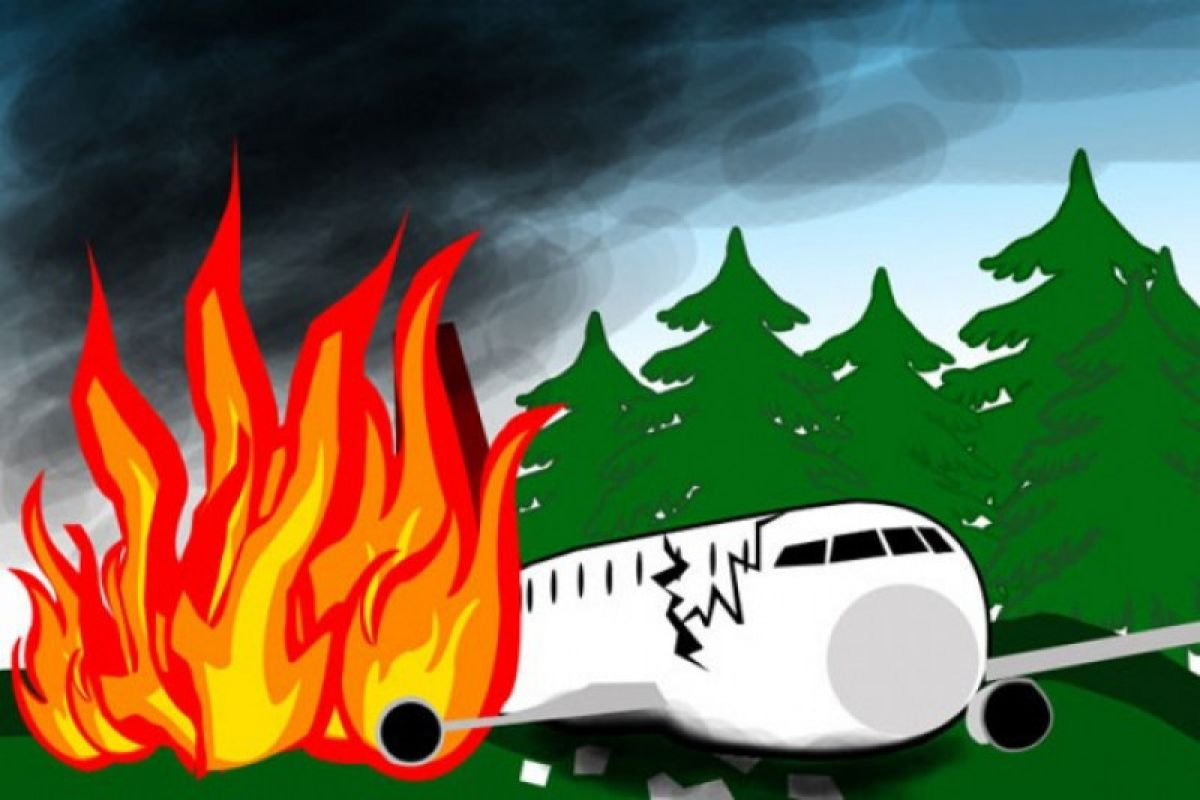

----

### Pemahaman Kolom

- Data  = Tanggal terjadinya kecelakaan

- Time  = Waktu kecelakaan terjadi

- Location = Lokasi atau tempat kecelakaan terjadi (Kota, negara, area spesifik)

- Operator = Nama maskapai atau organisasi yang mengoperasikan pesawat

- Filght #  = Nomor penerbangan untuk mengindentifikasi pernerbangan tertentu

- Route     = Rute penerbangan yang diambil (asal dan tujuan)

- Type      = Jenis pesawat yang terlibat dalam pesawat

- Registration      = Nomor registrasi pesawat yang unik untuk di indetifikasi

- cn/ln             = Nomer seri pesawat (construction number)

- Aboard            = Jumlah total orang dalam pesawat, termasuk penumpang dan kru

- Fatalities        = Jumlah orang yang meninggal akibat kecelakaan

- Ground            = Jumlah korban didarat yang terlibat dalam kecelakaan

- Summary           = Ringkasan atau deskripsi singkat mengenai kejadian kecelakaan

-----

### Exploratory Data Analysis

In [2]:
# import library yang digunakan

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno
from datetime import date, timedelta, datetime

In [3]:
# Membaca data 

data = pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908.csv')

In [4]:
data.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


In [5]:
data.tail()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
5263,05/20/2009,06:30,"Near Madiun, Indonesia",Military - Indonesian Air Force,NaN,Jakarta - Maduin,Lockheed C-130 Hercules,A-1325,1982,112.0,98.0,2.0,"While on approach, the military transport cras..."
5264,05/26/2009,NaN,"Near Isiro, DemocratiRepubliCongo",Service Air,NaN,Goma - Isiro,Antonov An-26,9Q-CSA,5005,4.0,4.0,NaN,The cargo plane crashed while on approach to I...
5265,06/01/2009,00:15,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,447,Rio de Janeiro - Paris,Airbus A330-203,F-GZCP,660,228.0,228.0,0.0,The Airbus went missing over the AtlantiOcean ...
5266,06/07/2009,08:30,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,NaN,Lourdes de BlanSablon - Port Hope Simpson,Britten-Norman BN-2A-27 Islander,C-FJJR,424,1.0,1.0,0.0,The air ambulance crashed into hills while att...
5267,06/08/2009,NaN,"State of Arunachal Pradesh, India",Military - Indian Air Force,NaN,Mechuka for Jorhat,Antonov An-32,NaN,NaN,13.0,13.0,0.0,The military transport went missing while en r...


In [6]:
data.columns

Index(['Date', 'Time', 'Location', 'Operator', 'Flight #', 'Route', 'Type',
       'Registration', 'cn/In', 'Aboard', 'Fatalities', 'Ground', 'Summary'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          5268 non-null   object 
 1   Time          3049 non-null   object 
 2   Location      5248 non-null   object 
 3   Operator      5250 non-null   object 
 4   Flight #      1069 non-null   object 
 5   Route         3561 non-null   object 
 6   Type          5241 non-null   object 
 7   Registration  4933 non-null   object 
 8   cn/In         4040 non-null   object 
 9   Aboard        5246 non-null   float64
 10  Fatalities    5256 non-null   float64
 11  Ground        5246 non-null   float64
 12  Summary       4878 non-null   object 
dtypes: float64(3), object(10)
memory usage: 535.2+ KB


In [8]:
# Drop column 'Flight #', 'Registration', 'cn/In', 'Time'

data.drop(['Flight #', 'Registration', 'cn/In', 'Time', 'Route'], inplace=True, axis=1)

In [9]:
# Missing values

data.isnull().sum()

Date            0
Location       20
Operator       18
Type           27
Aboard         22
Fatalities     12
Ground         22
Summary       390
dtype: int64

<Axes: >

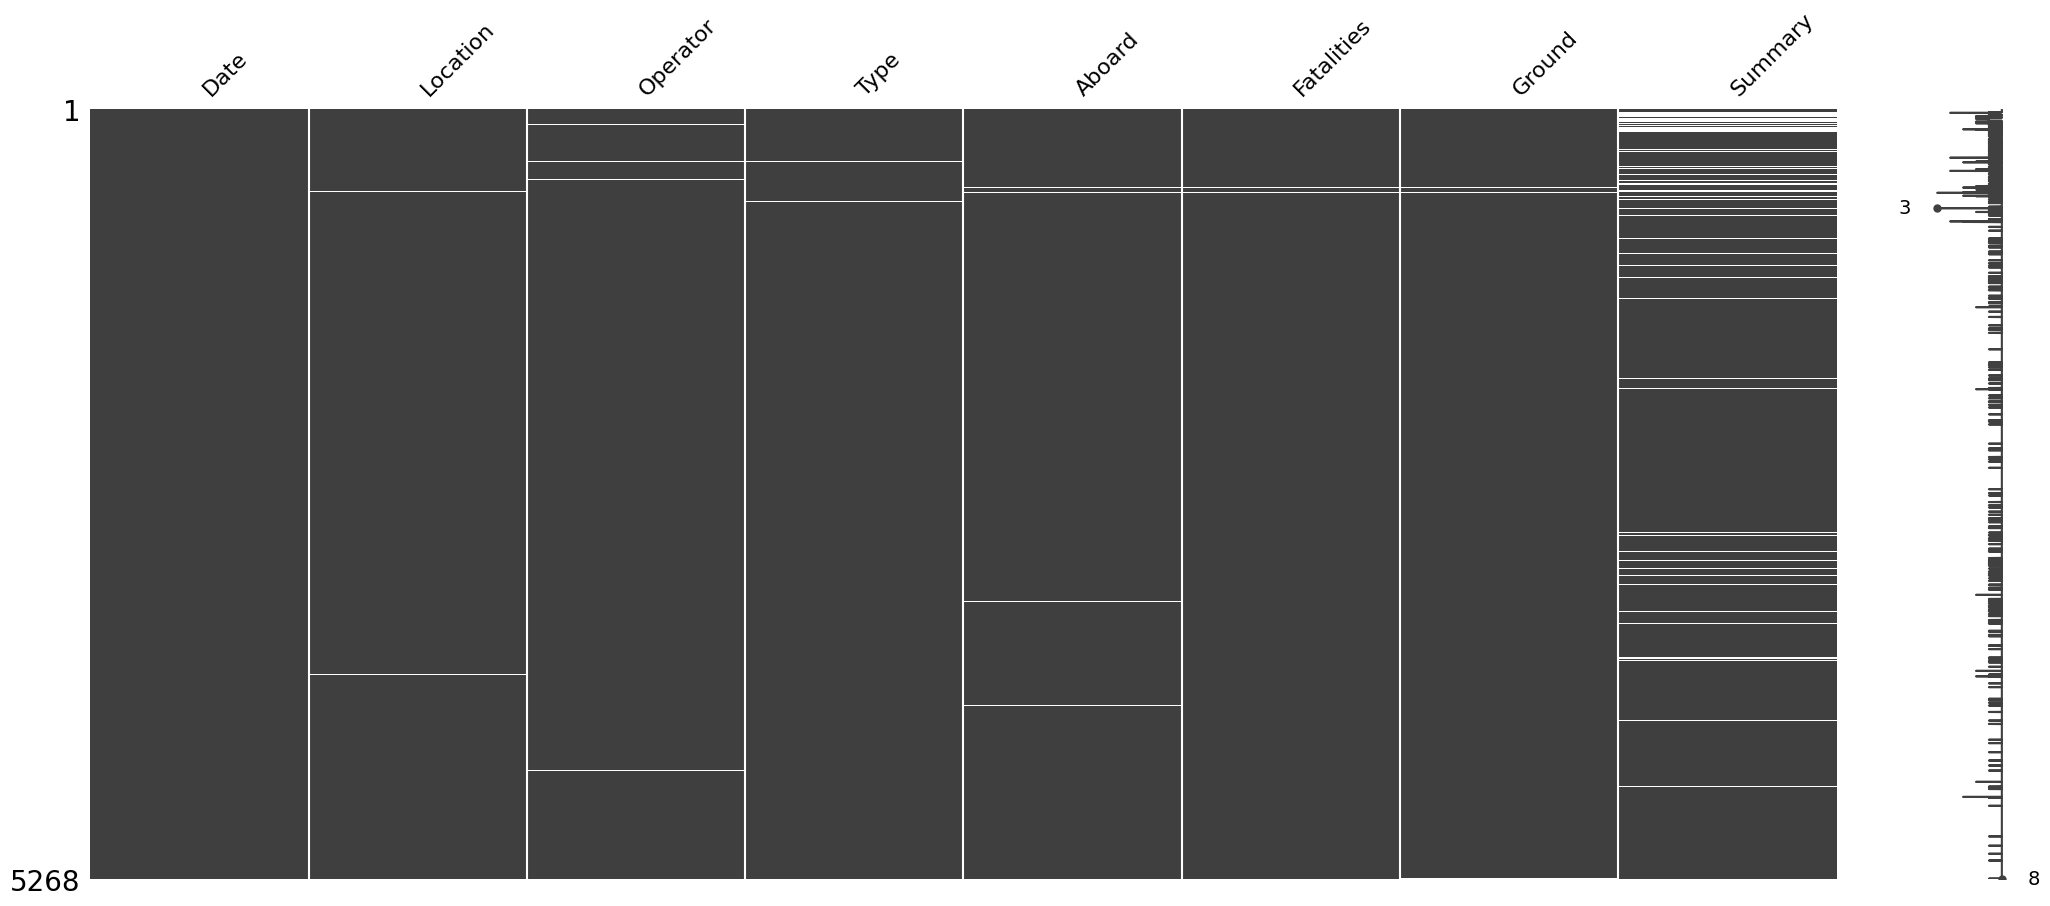

In [10]:
# Show matrix missing values column

msno.matrix(data)

In [11]:
# Handling mising values 

data['Location'] = data['Location'].fillna('No found')
data['Operator'].fillna(data['Operator'].mode()[0],inplace=True)
data['Type'].fillna(data['Type'].mode()[0],inplace=True)
data['Aboard'].fillna(data['Aboard'].mode()[0],inplace=True)
data['Fatalities'].fillna(data['Fatalities'].mode()[0],inplace=True)
data['Ground'].fillna(data['Ground'].mode()[0],inplace=True)
data['Summary'] = data['Summary'].fillna('Unknown')




C:\Users\Deon Harefa\AppData\Local\Temp\ipykernel_17768\1714585584.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Operator'].fillna(data['Operator'].mode()[0],inplace=True)
C:\Users\Deon Harefa\AppData\Local\Temp\ipykernel_17768\1714585584.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

In [12]:
# Checking data duplicated

data.duplicated().sum()

np.int64(0)

In [13]:
# Ubah type data kolom 'Date' menjadi 'Datetime'

data['Date'] = pd.to_datetime(data['Date'])
data['Country'] = data['Location'].str.split(',').str[-1].str.strip().str.upper()


In [14]:
data['Date'] = pd.DatetimeIndex(data['Date'])
data['Year'] = pd.DatetimeIndex(data['Date']).year # Menambahkan kolom tahun saja 

### Berapa banyak pesawat yang mengalami kecelakaan


In [15]:
data['Type'].value_counts()

Type
Douglas DC-3                                361
de Havilland Canada DHC-6 Twin Otter 300     81
Douglas C-47A                                74
Douglas C-47                                 62
Douglas DC-4                                 40
                                           ... 
Consolidated B24H                             1
Avro 683 Lancaster                            1
Blériot Spad 46                               1
de Havilland DH-34                            1
Bell UN-1N Huey                               1
Name: count, Length: 2446, dtype: int64

Berdasarkan apa yang diketahui diatas, ada beberapa macam pesawat yang mengalami kecelakaan dengan type pesawat yang berbeda beda. Jika dihitung ada 2446 pesawat yang sudah mengalami kecelakaan dengan nama maskapai yang berbeda beda

<Axes: title={'center': 'Jenis pesawat yang banyak mengalami kecelakaan'}, ylabel='Type'>

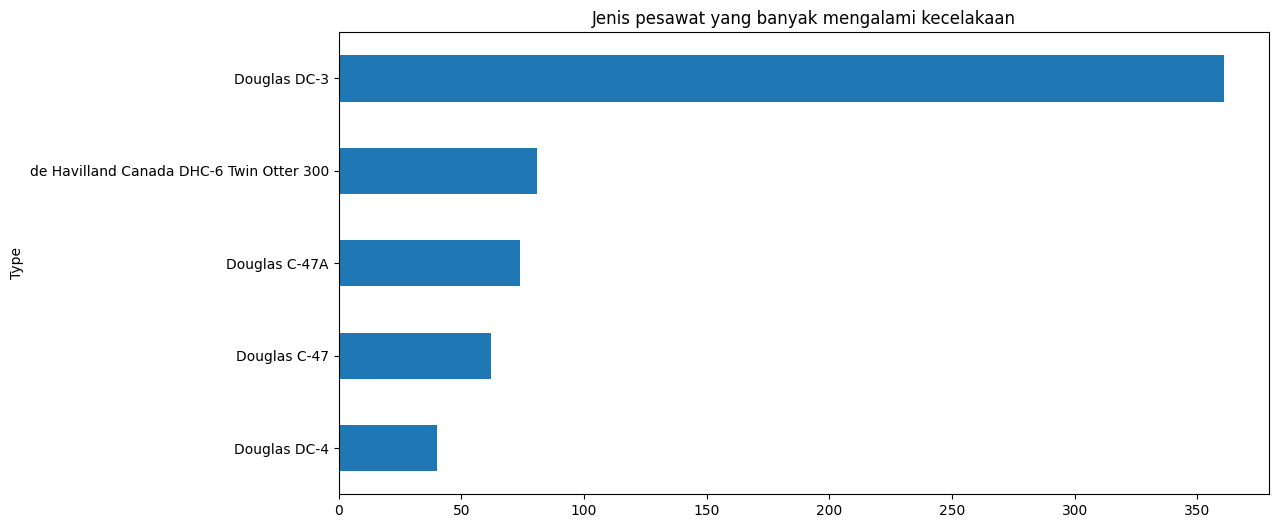

In [16]:
data['Type'].value_counts().head(5).sort_values().plot(
kind='barh',figsize=[12, 6], title='Jenis pesawat yang banyak mengalami kecelakaan')

Pada grafik batang diatas, ada 5 jenis pesawat yang paling banyak mengalami kecelakaan. Posisi pertama ada Type pesawat 
"Douglas DC-3" dengan total kecelakaan 350 kali, diikuti posis kedua ada type pesawat "de Havilland Canada DHC-6 Twin Otter 300" dengan total kecelakaan sebanyak 81 kali. Posisi ketiga ada type pesawat "Douglas C-47A" dengan total kecelakaan sebanyak 74 kali, dan ikuti dengan type pesawat "Douglas C-47" posisi keempat dan "Douglas DC-4" posis kelima

### Berapa banyak pesawat yang mengalami kecelakaan per tahun

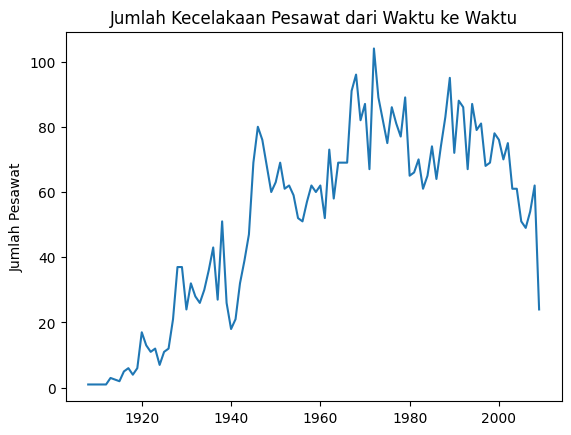

In [17]:
crasher_year = data['Year'].value_counts().sort_index()

plt.Figure(figsize=(15,8))
plt.plot(crasher_year.index, crasher_year.values)
plt.title('Jumlah Kecelakaan Pesawat dari Waktu ke Waktu')
# plt.xlabel('Year')
plt.ylabel('Jumlah Pesawat')

plt.show()

<Axes: title={'center': 'Pesawat yang mengalami kecelakan per tahun'}, xlabel='Jumlah', ylabel='Tahun'>

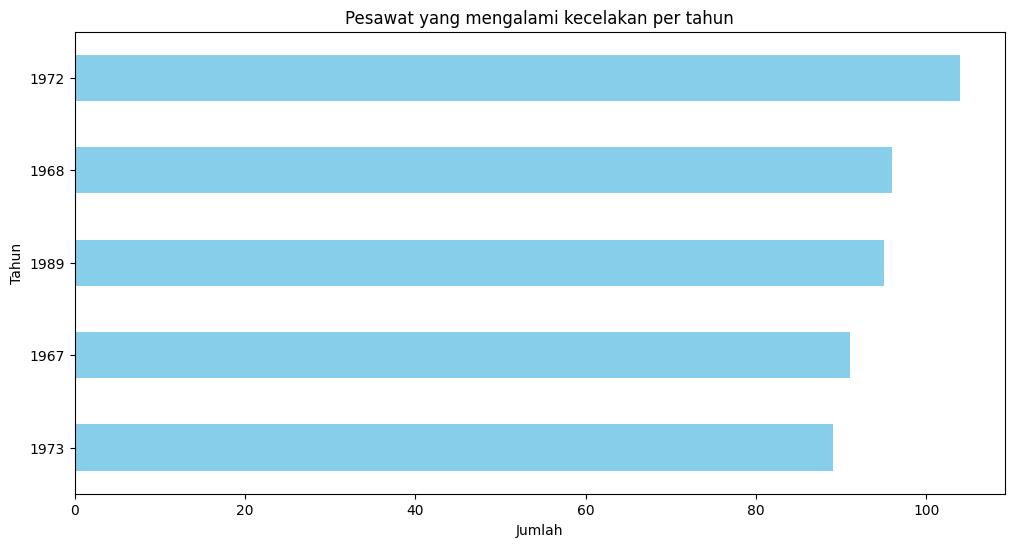

In [18]:
# Top 5 kecelakaan pesawatar per tahunnya 

data['Year'].value_counts().head(5).sort_values().plot(
kind='barh',figsize=[12, 6], title='Pesawat yang mengalami kecelakan per tahun',
xlabel='Jumlah',
ylabel='Tahun',
color='skyblue')

Visualisasi diatas menunjukkna kecelakaan pesawat disetip tahunnya. Pada grafik diatas ada 5 top yang paling banyak mengalami kecelakaan setiap tahunnya. Tahun 1972 total pesawat yang mengalami kecelakaan 104 pesawat, diikuti tahun 1968 ada 96 pesawat dan tahun 1989 ada 95 dan seterusnya

### Negara Dengan Lokasi Kecelakaan Pesawat Terbanyak

In [19]:
data['Country'].value_counts()

Country
BRAZIL             189
ALASKA             177
RUSSIA             175
CANADA             149
COLOMBIA           149
                  ... 
YUGOSALVIA           1
COMOROS              1
SAMOA                1
NORTHERN ISRAEL      1
MAURETANIA           1
Name: count, Length: 497, dtype: int64

In [20]:
data['Country'].value_counts()
space = [0.1,0,0,0,0]

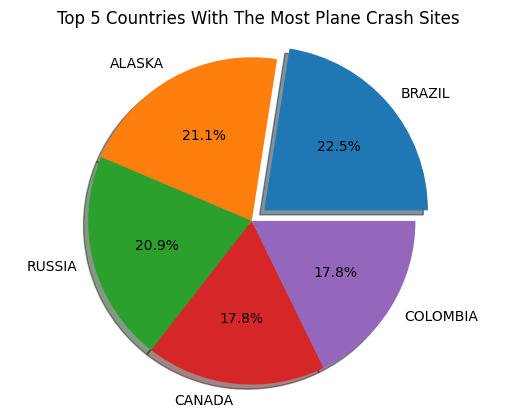

In [21]:
crasher_airplanes_country = data['Country'].value_counts().head(5)

plt.Figure(figsize=(12,8))
plt.pie(crasher_airplanes_country.values, labels=crasher_airplanes_country.index,
        explode=space,shadow=True, autopct='%1.1f%%')

plt.axis('equal')
plt.title('Top 5 Countries With The Most Plane Crash Sites')
#plt.legend(title='Country', loc = 'upper left')
plt.show()

5 Negara dengan siklus kecelakaan pesawat terbanyak 

Diposisi pertama ada negara Brazil dengan persentase tertinggi sebesar 22,5%. Hal ini menunjukkan bahwa kecelakaan ini mungkin disebabkan beberapa faktor faktor seperti kepadatan lalu lintas udara, kondisi geografis, atau infastruktur penerbangan.

Dilanjukan dengan posisi kedua yaitu Alaska dengan persentase 21,1%. Negara yang terletak dipaling utara dan barat laut ini memiliki beberapa alasan mengapa banyaknya kasus terjadi pesawat jatuh dilokasi ini, di Alaska sendiri sangat sulit diakses melalui darat sehingga jalur udaralah yang menjadi solusi untuk kesana. Penerbangan disana berisiko karan Alaska sendiri memiliki iklim cuaca yang sering berubah dan ekstrem seperti kabut, salju dan lapisan es dapat meningkatkan resiko kecelakaan pesawat. Hal ini yang dapat dikatakan menjadi penyabab banuak resiko kecelakaan di Alaska.

Dilanjukan dengan Rusia(20,9%), canada(17,8%) dan colombia(17,8%) memiliki persentase yang seimbang, hal ini menunjukkan bahwa negara-negara ini juga memiliki tantangan dalam keselamatan penerbangan, mungkin juga dipengaruhi oleh iklim dan geografi.

### Perbanding Angka Kematian dalam Peristiwa Kecelakaan Pesawat

In [22]:
Operator_Airplanes = data.groupby(['Operator'])['Fatalities'].sum().sort_values(ascending=False).head(10).reset_index()
Operator_Airplanes

,Operator,Fatalities
0,Aeroflot,7312.0
1,Military - U.S. Air Force,3717.0
2,Air France,1736.0
3,American Airlines,1421.0
4,Pan American World Airways,1302.0
5,Military - U.S. Army Air Forces,1070.0
6,United Air Lines,1021.0
7,AVIANCA,941.0
8,Turkish Airlines (THY),891.0
9,Indian Airlines,863.0


C:\Users\Deon Harefa\AppData\Local\Temp\ipykernel_17768\716666990.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Operator_Airplanes,x='Operator', y='Fatalities',


<function matplotlib.pyplot.show(close=None, block=None)>

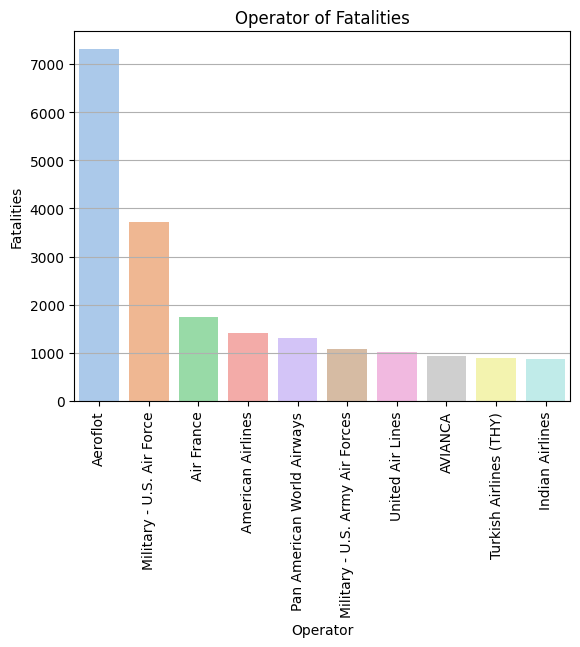

In [23]:

plt.Figure(figsize=(12,8))
sns.barplot(data=Operator_Airplanes,x='Operator', y='Fatalities',
            palette='pastel')

plt.title('Operator of Fatalities')
plt.grid(axis='y')
plt.xticks(rotation=90)
plt.show

Pada grafik diatas menunjukkan angka kematian yang disebabkan oleh jatuh pesawat di berbagai maskapai. 

Aeroflot, maskapai pesawat dengan nama tersebut menjadi posisi terbanyak memakan korban dengan jumlah lebih dari 6000 korban jiwa. Kemudian disusul dengan pesawat dengan nama maskapai Military - U.S. Air Force dengan total jumlah korban 3500 lebih korban. Dan berbagai maskapai pesawat yang mengalami kecalakaan pesawat dengan total korban yang segnifikan